In [5]:
import pickle
import numpy as np

In [6]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [22]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [7]:
embeddings = np.array(x)

In [8]:
# do PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(embeddings)

pca_transform = pca.transform(embeddings)

In [9]:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(len(fine_labels))

100


In [10]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(pca_transform[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


(100, 2)


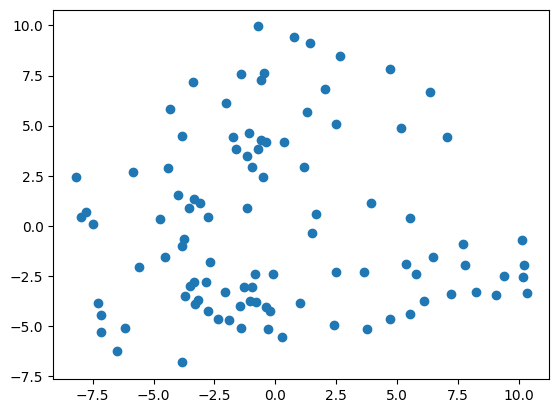

In [11]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

plt.scatter(pca_centroids_transform[:,0], pca_centroids_transform[:,1])
plt.show()

In [12]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate distances from the first centroid
    distances = np.linalg.norm(curr_points - curr_points[i], axis=1)

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted [ 0 57 83 53 10 92 61 22 77 70 40 55 65 51 50 72  4 80 32  3 97 84 66 38
 34  7 16 94 71 64 45 28 23 63 79  9 26 88  2 37 62 74 91 67 75 58 25 42
 43 96 82 56 36 18 29 73 47 99 69 15 54 11 33 24 17 44 78 89 35  1 60 87
 19 93 95 46  5 30 81 31 14 41 98 59 90 52 39 20 21 13 12 27 85 49  8 86
  6 68 76 48]
[ 0 57 83 53 10 92 61 22 77 70]
(90, 100)
sorted [ 1  9 32 88 43 29 59 33 47 22 42 75 41 37 58 72 51 70 65 23 50 48 57  4
 83 12 38 56 36 82  3  0 35 31  7 60  2 61 71 87 26 67 13 14 68 11 39 89
 18 19  6 79  8 24 77 66 80 16 25 78  5 73 40 53 17 45 81 21 74 27 34 84
 63 20 28 30 44 85 10 54 76 64 15 46 86 62 55 52 69 49]
[ 2 11 35 98 46 32 65 36 50 25]
(80, 100)
sorted [ 2 43 58 56 49  1 63 21 50 74 51 29 17 52 23 33 35 25 59 34 24 40 11 26
 27 78 76 20 73 36  5 72 62  0 57 46 10 15  4 77 61 14 70 19 65 66  8 31
 41 28 37 44 39 64 30 71 69 67 12 18 55  9 68 75 79 22  7 16  6 48 32 13
 53 45  3 38 60 47 54 42]
[ 4 55 74 72 63  3 80 27 64 93]
(70, 100)
sorted [ 3 17 54  2  8 12 3

In [13]:
print(parents)

{0: array([ 0, 57, 83, 53, 10, 92, 61, 22, 77, 70]), 1: array([ 2, 11, 35, 98, 46, 32, 65, 36, 50, 25]), 2: array([ 4, 55, 74, 72, 63,  3, 80, 27, 64, 93]), 3: array([ 7, 24, 79,  6, 14, 18, 44, 26, 45, 82]), 4: array([12, 37, 90, 17, 76, 68, 85, 81, 69, 71]), 5: array([15, 19, 31, 38, 29, 43, 34, 97, 66, 84]), 6: array([20,  5, 94, 40, 87, 91, 39, 86, 99, 28]), 7: array([30, 95, 73, 67, 23, 49,  1, 75, 56, 59]), 8: array([47, 52, 96, 33, 60, 62, 51, 42, 88, 13]), 9: array([89, 58, 41, 48,  8, 78, 21,  9, 16, 54])}


In [14]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{0: 0, 57: 0, 83: 0, 53: 0, 10: 0, 92: 0, 61: 0, 22: 0, 77: 0, 70: 0, 2: 1, 11: 1, 35: 1, 98: 1, 46: 1, 32: 1, 65: 1, 36: 1, 50: 1, 25: 1, 4: 2, 55: 2, 74: 2, 72: 2, 63: 2, 3: 2, 80: 2, 27: 2, 64: 2, 93: 2, 7: 3, 24: 3, 79: 3, 6: 3, 14: 3, 18: 3, 44: 3, 26: 3, 45: 3, 82: 3, 12: 4, 37: 4, 90: 4, 17: 4, 76: 4, 68: 4, 85: 4, 81: 4, 69: 4, 71: 4, 15: 5, 19: 5, 31: 5, 38: 5, 29: 5, 43: 5, 34: 5, 97: 5, 66: 5, 84: 5, 20: 6, 5: 6, 94: 6, 40: 6, 87: 6, 91: 6, 39: 6, 86: 6, 99: 6, 28: 6, 30: 7, 95: 7, 73: 7, 67: 7, 23: 7, 49: 7, 1: 7, 75: 7, 56: 7, 59: 7, 47: 8, 52: 8, 96: 8, 33: 8, 60: 8, 62: 8, 51: 8, 42: 8, 88: 8, 13: 8, 89: 9, 58: 9, 41: 9, 48: 9, 8: 9, 78: 9, 21: 9, 9: 9, 16: 9, 54: 9}


In [15]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(pca_transform):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]      
    a[reverse[first_index]][y[i]] += 1

    

In [16]:
print(y.shape)
print(np.max(y))

(49984,)
99


(100, 2)


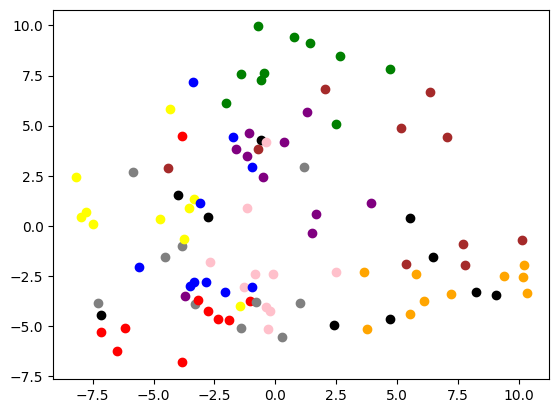

In [17]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

# color each centroid with the color of the parent cluster

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']

for i in range(100):
    plt.scatter(pca_centroids_transform[i,0], pca_centroids_transform[i,1], color=colors[reverse[i]])

plt.show()

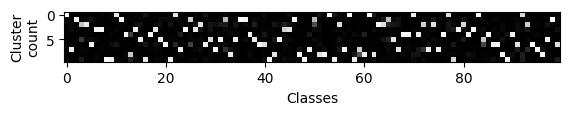

In [18]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

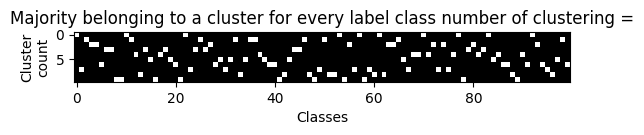

In [19]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [20]:
np.sum(c, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [21]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.15000800256081948


In [22]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(10000,)
